<a href="https://colab.research.google.com/github/RyanSfernandes/Precificando_casas/blob/main/precificando_casas_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando **Bibliotecas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carregando o arquivo

In [3]:
df = pd.read_csv("Preços_de_casas.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
df = df.drop(columns="Id")

# Correlação

In [6]:
corr = df.corr()

In [7]:
corr["preco_de_venda"]

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


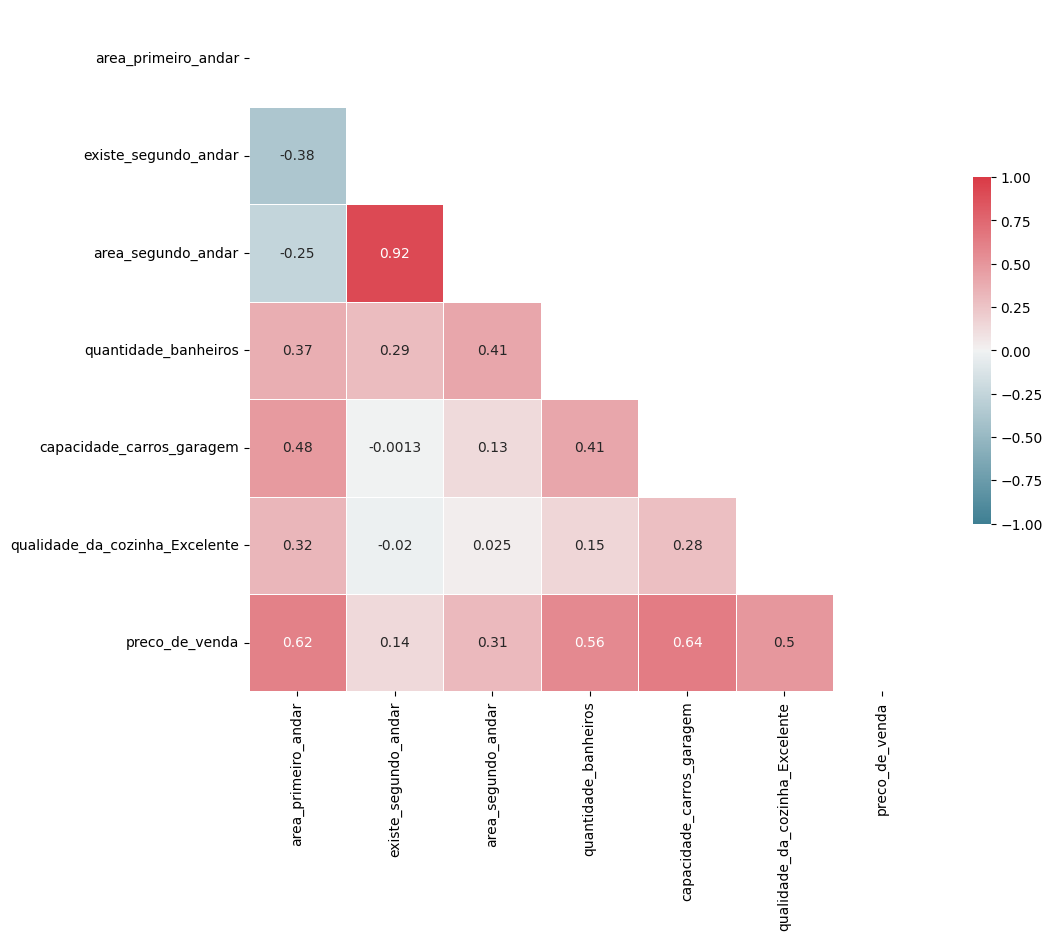

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Text(0, 0.5, 'Preço de venda')

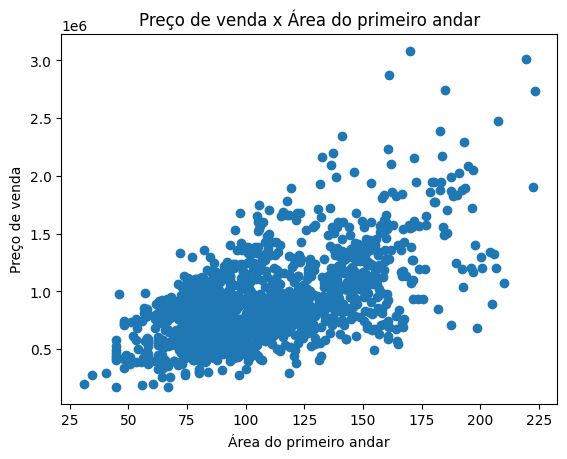

In [9]:
plt.scatter(df['area_primeiro_andar'] , df ["preco_de_venda"])
plt.title("Preço de venda x Área do primeiro andar")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")

Text(0, 0.5, 'Preço de venda')

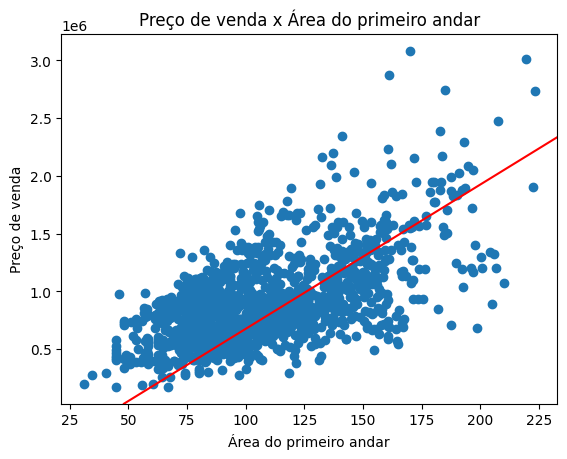

In [10]:
plt.scatter(df['area_primeiro_andar'] , df ["preco_de_venda"])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Preço de venda x Área do primeiro andar")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")

## Melhor Reta

In [11]:
# Qual a reta que melhor se adequa a relação?
px.scatter(df, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

## Explicando a reta

Ajustamos uma reta entre o valor de x, que representa a área do primeiro andar, e o valor de y, que representa o preço da casa. Como queremos explicar o preço da casa a partir do seu tamanho, dizemos que:

  A variável explicativa ou independente é a área do primeiro andar.


  A variável resposta ou dependente é o preço da casa.

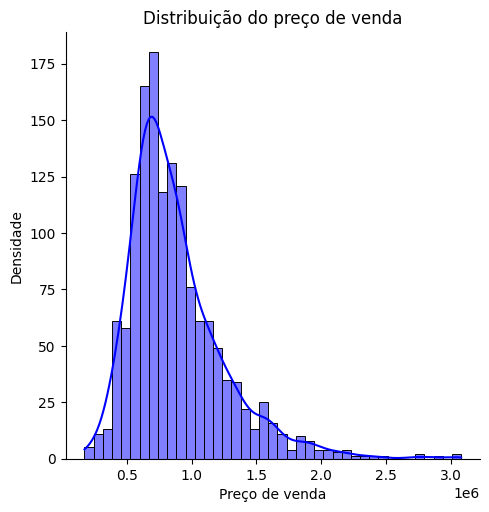

In [12]:
# quem é nossa variavel resposta

sns.displot(df['preco_de_venda'], kde=True , color='blue')
plt.title("Distribuição do preço de venda")
plt.xlabel("Preço de venda")
plt.ylabel("Densidade")
plt.show()

### Separação de Treino e Teste



In [13]:
# biblioteca para treino e teste
from sklearn.model_selection import train_test_split

In [14]:
# definição do y e x
y = df["preco_de_venda"]
x = df.drop(columns="preco_de_venda")

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size = 0.3, random_state= 230)

In [16]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = Y_train

In [17]:
#import ols
from statsmodels.formula.api import ols

In [18]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

### Analisando os coeficientes

In [19]:
# visualizando os parametros
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


In [20]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          2.22e-105
Time:                        13:31:36   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

### iterpretando o R²

In [21]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

O coeficiente R², também conhecido como coeficiente de determinação, retornou 0.37. Podemos interpretar isso como 37% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar. Isso representa uma quantidade significativa de explicação, mas há mais a ser analisado.

Quanto mais próximo de 1 o valor de R², melhor é a explicabilidade do modelo. Então, apesar de termos 37% de explicação com apenas uma variável, é importante compreender que outros fatores podem influenciar os preços das casas.

## Entendendo o Residuo

In [22]:
# Quais são os resíduos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


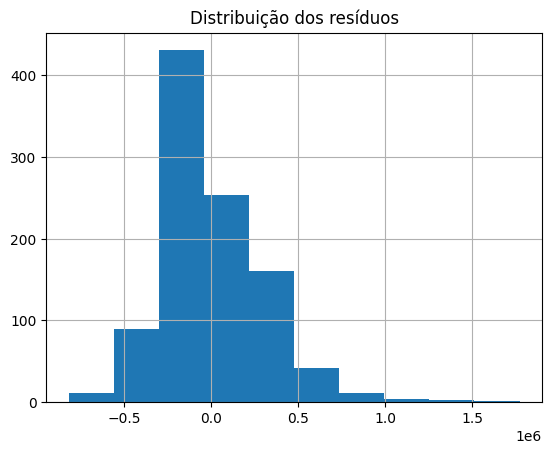

In [23]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

## Obtendo o R² da Previsão

In [24]:
# definindo o y previsto
y_predict = modelo_0.predict(X_test)


In [25]:
# importando o r2 score
from sklearn.metrics import r2_score

In [26]:
#printando o R²
print("R²: ", r2_score(Y_test,y_predict))

R²:  0.38530928723202407


# Histograma dos resíduos

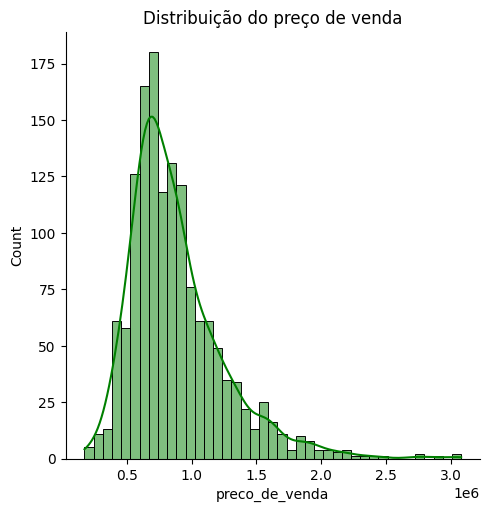

In [27]:
sns.displot(df['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

## Analisando os Fatores

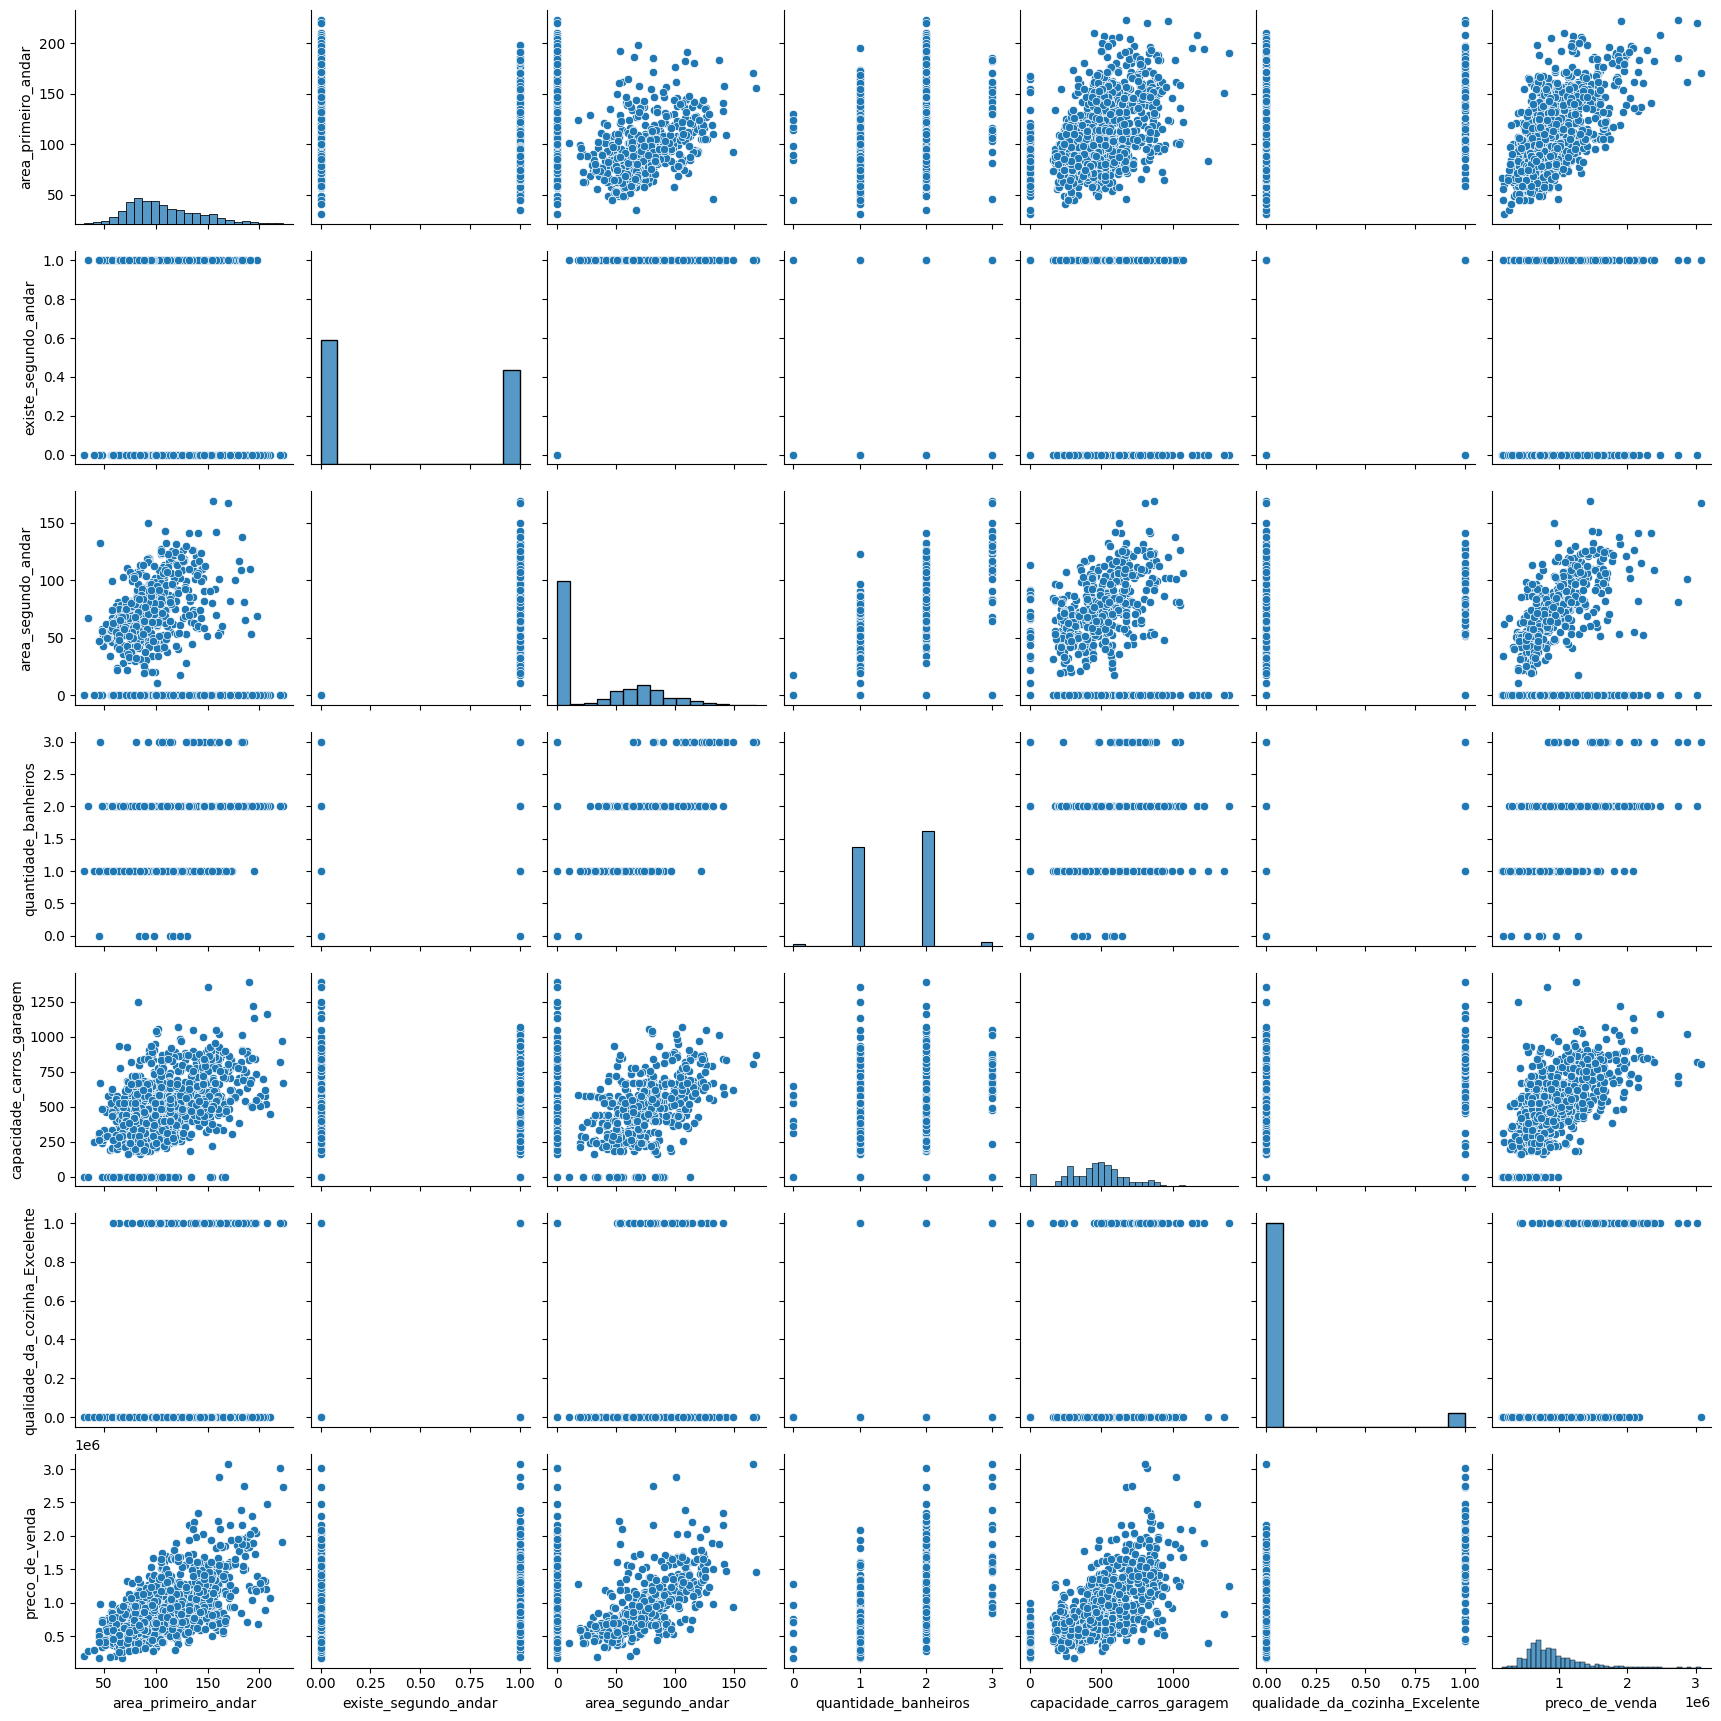

In [28]:
# Quais caracteristicas poderiam explicar o preço dos imoveis?
sns.pairplot(df)

In [29]:
df.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

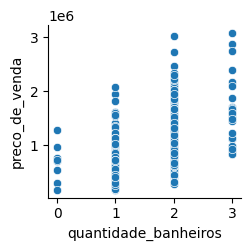

In [30]:
# Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(df, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

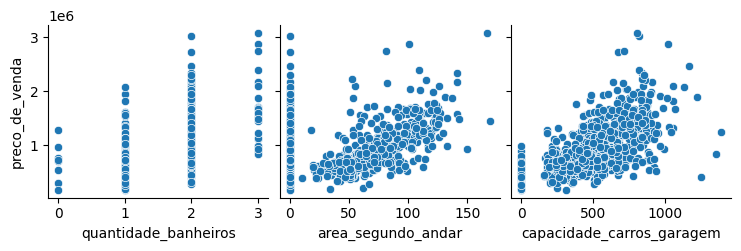

In [31]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(df, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

## Adicionando Fatores no modelo

In [32]:
# importando a api do statsmodels
import statsmodels.api as sm

In [33]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [34]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [35]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [36]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [37]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [38]:
# resultado do modelo 1
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          2.79e-289
Time:                        13:31:43   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -6.125e+04   2.66e+04     -2.300      0.022   -1.14e+05   -8995.504
area_primeiro_andar             4875.9606    263.564     18.500      0.000    4358.757    5393.164
existe_segundo_andar           -1.344e+05   3.28e+04     -4.100      0.000   -1.99e+05   -7.01e+04
area_segundo_andar              4709.3824    415.473     11.335      0.000    3894.082    5524.683
quantidade_banheiros            6.463e+04   1.44e+04      4.477      0.000    3.63e+04     9.3e+04
capacidade_carros_garagem        432.7614     34.818     12.429      0.000     364.437     501.086
qualidade_da_cozinha_Excelente  3.779e+05   2.51e+04     15.034      0.000    3.29e+05    4.27e+05
==============================================================================
Omnibus:                      122.435   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.557
Skew:                           0.235   Prob(JB):                    2.35e-207
Kurtosis:                       7.741   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# resultado do modelo 2
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          1.93e-264
Time:                        13:31:43   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.418e+05   2.73e+04     -5.202      0.000   -1.95e+05   -8.83e+04
area_primeiro_andar             4746.1134    279.596     16.975      0.000    4197.451    5294.776
existe_segundo_andar            1.929e+05   1.65e+04     11.713      0.000    1.61e+05    2.25e+05
quantidade_banheiros             1.07e+05   1.48e+04      7.224      0.000    7.79e+04    1.36e+05
capacidade_carros_garagem        507.4068     36.303     13.977      0.000     436.167     578.646
qualidade_da_cozinha_Excelente  3.849e+05   2.67e+04     14.423      0.000    3.32e+05    4.37e+05
==============================================================================
Omnibus:                      159.386   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.296
Skew:                           0.452   Prob(JB):                    3.30e-287
Kurtosis:                       8.537   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# resultado do modelo 3
modelo_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          4.15e-227
Time:                        13:31:43   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -1.3e+05   2.98e+04     -4.367      0.000   -1.88e+05   -7.16e+04
area_primeiro_andar             6119.6532    286.041     21.394      0.000    5558.344    6680.963
existe_segundo_andar            2.213e+05   1.79e+04     12.390      0.000    1.86e+05    2.56e+05
quantidade_banheiros             1.49e+05   1.58e+04      9.407      0.000    1.18e+05     1.8e+05
qualidade_da_cozinha_Excelente  4.444e+05   2.88e+04     15.437      0.000    3.88e+05    5.01e+05
==============================================================================
Omnibus:                      119.666   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.200
Skew:                           0.403   Prob(JB):                    6.39e-137
Kurtosis:                       6.783   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Comparando os modelos


In [41]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [42]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [43]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


# Precificando as casas

## Obtendo o R² da previsão

In [44]:
X_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [45]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [46]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [47]:
# Prevendo com o modelo_3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [48]:
modelo_3.rsquared

np.float64(0.6511289354898803)

In [49]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))

R²:  0.6432078074497706


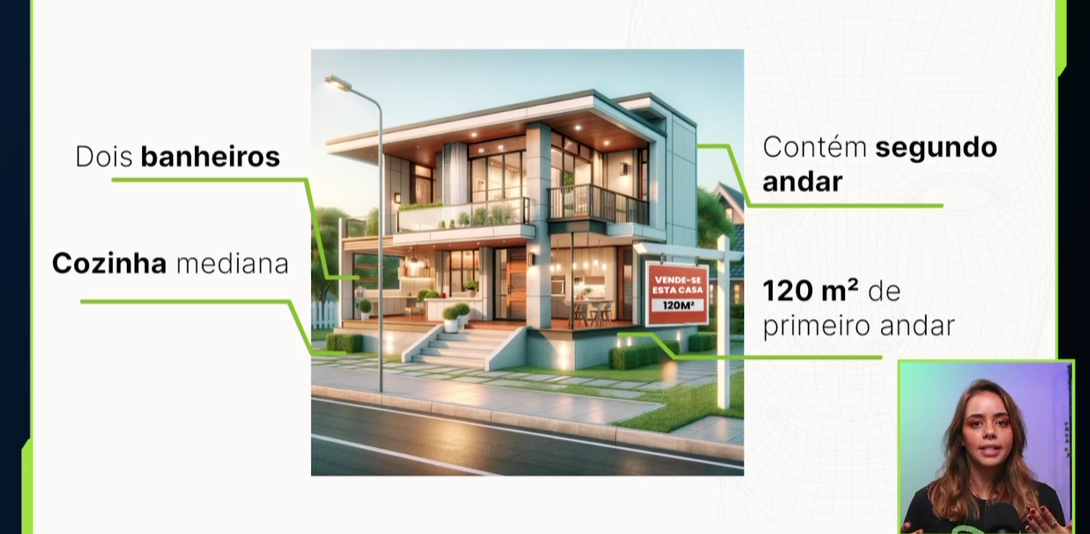

In [50]:
# novo imovel
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar':[1],
                            'quantidade_banheiros':[2],
                            'qualidade_da_cozinha_Excelente':[0]
                            })

In [51]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


In [52]:
# Qual o preço desse imóvel com o modelo_3?
print (modelo_3.predict(novo_imovel)[0])

1123758.2426020515


# Precificando várias casas

In [53]:
# Lendo várias casas
novas_casas = pd.read_csv("Novas_casas.csv", sep = ";")

In [54]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [55]:
# eliminando a coluna casa
novas_casas = novas_casas.drop(columns ='Casa' )

In [56]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [57]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


## Exercicio

Você recebeu uma demanda para estimar o preço de uma casa com as seguintes características:


*   1 banheiro
*   Área 98m²
*   Não contém segundo andar
*   Qualidade da cozinha excelente





In [58]:
# novo imovel
novo_imovel2 = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar':[0],
                            'quantidade_banheiros':[1],
                            'qualidade_da_cozinha_Excelente':[1]
                            })

In [59]:
# Qual o preço desse imóvel com o modelo_3?
print (modelo_3.predict(novo_imovel2)[0])

1063173.8519646404


In [60]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel2['area_primeiro_andar'])

,0
0,818686.169194


# Multicolinearidade

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [63]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [64]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [65]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [66]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


In [67]:
# Basicamente quando o numero é maior que 5, indica que o modelo possue uma grande colinearidade entre as váriaveis

In [68]:
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [69]:
fig = px.scatter(x=y_previsto_train, y=Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [70]:
#residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

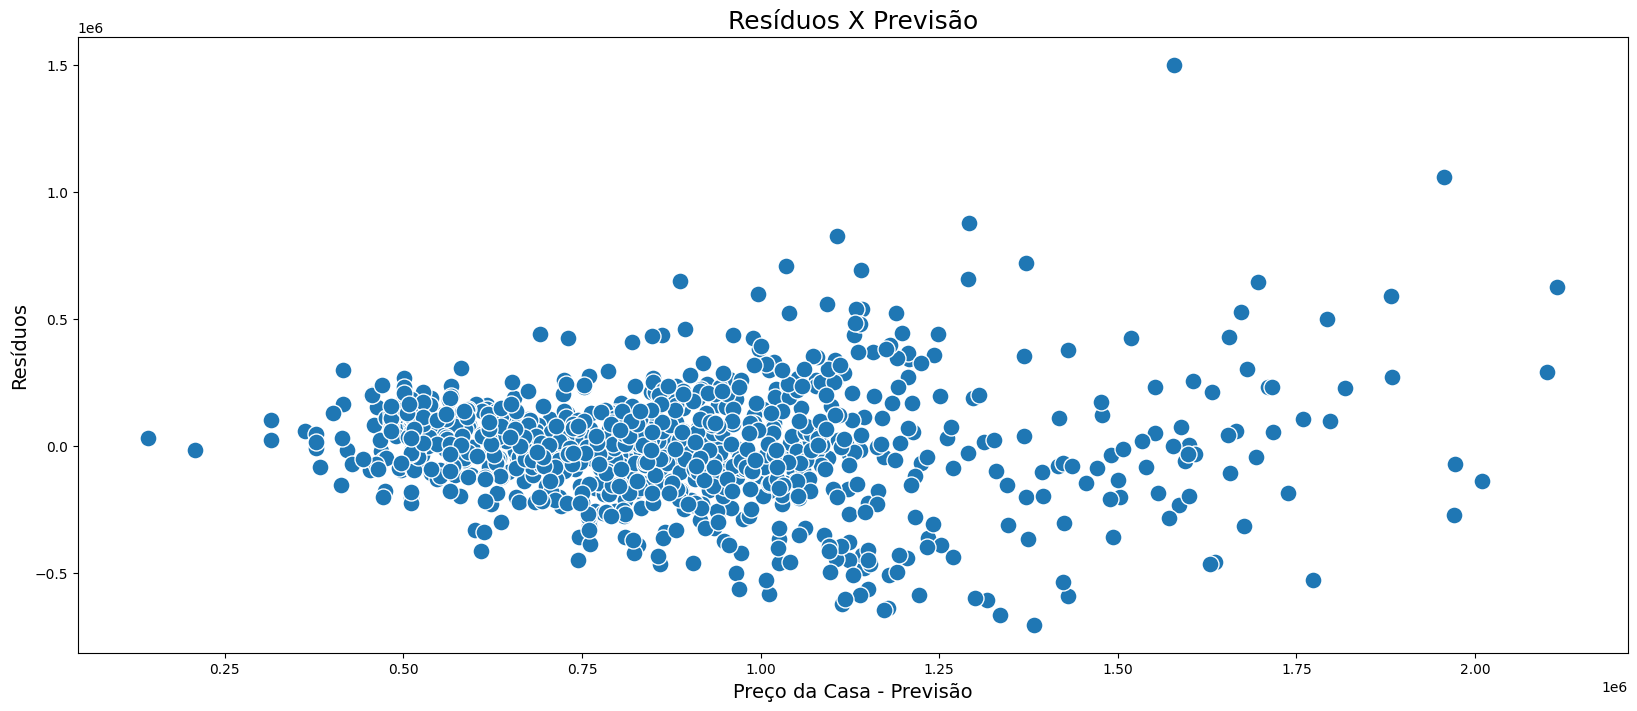

In [71]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax